In [58]:
%matplotlib notebook
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Find the Number of Unique Sensors 

In [62]:
df_bme_list = list()

for bme in ['2017-08_bme280sof.csv']: #glob.glob('*bme280sof.csv'):
    df_bme = pd.read_csv(bme)
    
    df_bme_list.append(df_bme)

#     #print(len(df_bme['sensor_id'].unique()))
#     print(len(df_bme['location'].unique()))

In [63]:
df_bme = pd.concat(df_bme_list)

In [71]:
df_bme.head(3)

,Unnamed: 0,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity
0,3,3642,1837,42.694,23.360,2017-08-01T00:00:02,95565.32,20.57,59.72
1,4,3102,1561,42.665,23.392,2017-08-01T00:00:05,95804.66,20.91,56.63
2,6,4475,2250,42.654,23.316,2017-08-01T00:00:06,95105.52,21.16,56.28


In [3]:


df_bme['time_stamp'] = pd.to_datetime(df_bme['timestamp'])

# Veracity 

### Location of Sensors

<IPython.core.display.Javascript object>


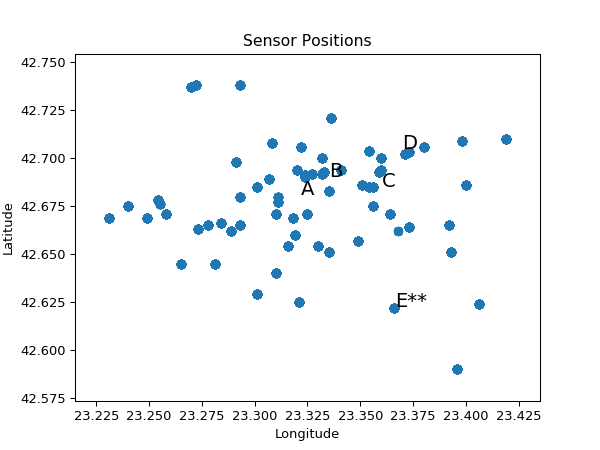

In [66]:
plt.figure(1)
plt.scatter(df_bme['lon'],df_bme['lat'])
plt.annotate('C',(23.36,42.685),size=15)
plt.annotate('D',(23.37,42.705),size=15)
plt.annotate('B',(23.335,42.69),size=15)
plt.annotate('A',(23.322,42.681),size=15)
plt.annotate('E**',(23.3663,42.62223),size=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sensor Positions')
plt.savefig('Sensor Locations.png')
plt.show()

### See if Close Sensors Have Similar Readings

In [5]:
close_sensors = df_bme[ ((df_bme['lat']<=42.691) & (df_bme['lat']>=42.689)) | ((df_bme['lon']<=23.3239) & (df_bme['lon']>=23.3242))].sort_values(['timestamp'])

far_sensor = df_bme[ ((df_bme['lat']<=42.6223) & (df_bme['lat']>=42.6217)) | ((df_bme['lon']<=23.3663) & (df_bme['lon']>=23.3658))].sort_values(['timestamp'])


In [6]:
sen_1 = close_sensors[(close_sensors['timestamp']>='2017-07-01T00:00:56') &\
                      (close_sensors['timestamp']<='2017-07-01T01:00:56') &\
                      (close_sensors['sensor_id']==1962)]

sen_2 = close_sensors[(close_sensors['timestamp']>='2017-07-01T00:00:56') &\
                      (close_sensors['timestamp']<='2017-07-01T01:00:56') &\
                      (close_sensors['sensor_id']==2262)]

sen_3 = far_sensor[(far_sensor['timestamp']>='2017-07-01T00:00:56') &\
                      (far_sensor['timestamp']<='2017-07-01T01:00:56') ]

<IPython.core.display.Javascript object>


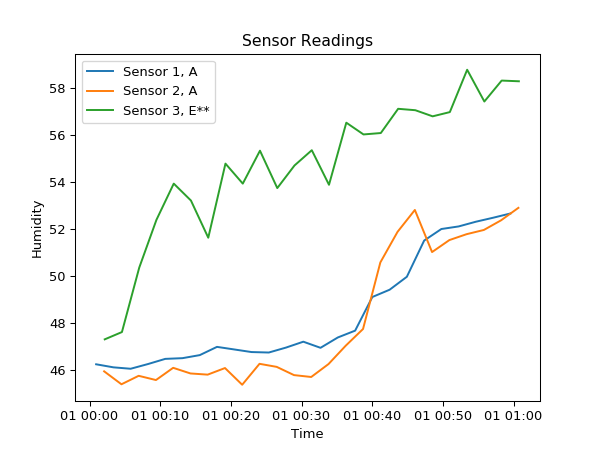

C:\Users\jesse\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\jesse\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\jesse\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [67]:
plt.figure(2)
plt.plot(sen_1['time_stamp'],sen_1['humidity'],label='Sensor 1, A')
plt.plot(sen_2['time_stamp'],sen_2['humidity'],label='Sensor 2, A')
plt.plot(sen_3['time_stamp'],sen_3['humidity'],label='Sensor 3, E**')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.title('Sensor Readings')
plt.savefig('Sensor Readings.png')
plt.show()

### Prove Readings are Representative

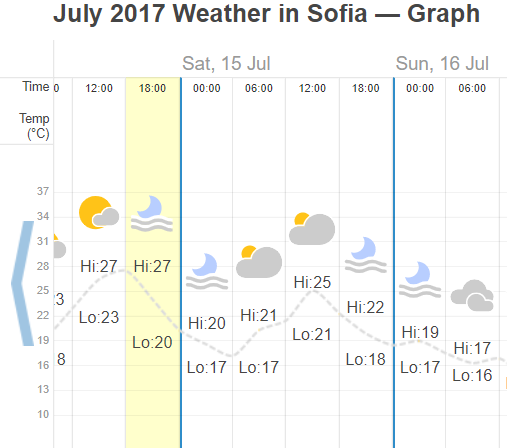

In [8]:
from IPython.display import Image
Image("Sophia_Weather_2017-07-15.PNG")

In [9]:
info_15th = df_bme[(df_bme['timestamp']>='2017-07-15T00:00:56') &\
                      (df_bme['timestamp']<='2017-07-16T00:00:56')]

<IPython.core.display.Javascript object>


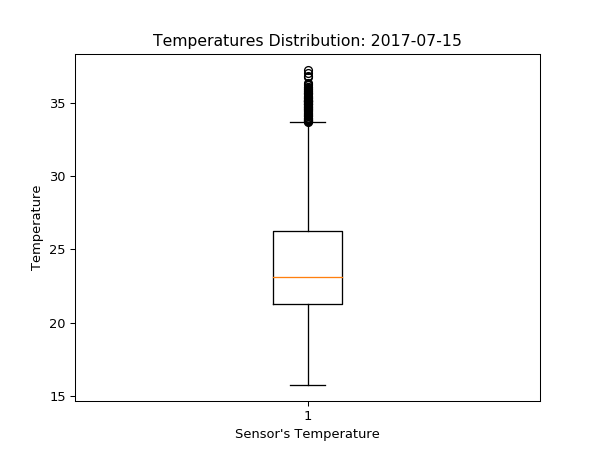

In [70]:
plt.figure(3)
plt.boxplot(info_15th['temperature'])
plt.xlabel("Sensor's Temperature")
plt.ylabel('Temperature')
plt.title('Temperatures Distribution: 2017-07-15')
plt.savefig('Temperatures Distribution.png')
plt.show()

In [11]:
info_15th['temperature'].mean()

23.880091332799815

In [12]:
info_15th['temperature'].min()

15.78

# Velocity 

In [73]:
df_bme = pd.read_csv('2017-07_bme280sof.csv') # '2018-07_bme280sof.csv'

df_bme['time_stamp'] = pd.to_datetime(df_bme['timestamp'])

In [74]:
sorted_sensor_time = df_bme.sort_values(['sensor_id','time_stamp'],ascending=True)

In [75]:
sorted_sensor_time['Time_Differences'] = sorted_sensor_time.groupby('sensor_id')['time_stamp'].diff().astype('timedelta64[s]')

In [76]:
sorted_sensor_time['Time_Differences'].median()

147.0

In [77]:
round(sorted_sensor_time[['Time_Differences']].describe(),2)

,Time_Differences
count,701492.00
mean,169.30
std,3371.11
min,1.00
25%,146.00
50%,147.00
75%,147.00
max,1315841.00


In [78]:
df_bme['Day'] = df_bme['time_stamp'].dt.day

<IPython.core.display.Javascript object>


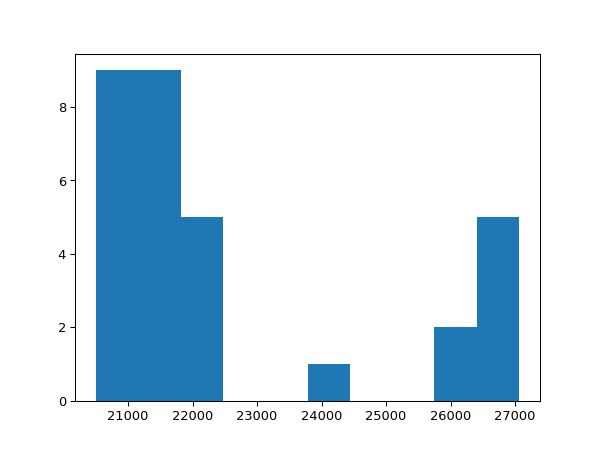

In [84]:
c = df_bme.groupby(['Day']).count().reset_index()

plt.figure(5)
plt.hist(c['time_stamp'],bins=10)
plt.show()

# Variety

In [48]:
df_bme

,Unnamed: 0,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity,time_stamp
0,1,2266,1140,42.738,23.272,2017-07-01T00:00:07,95270.27,23.46,62.48,2017-07-01 00:00:07
1,5,2292,1154,42.663,23.273,2017-07-01T00:00:08,94355.83,23.06,59.46,2017-07-01 00:00:08
2,7,3096,1558,42.700,23.360,2017-07-01T00:00:10,95155.81,26.53,44.38,2017-07-01 00:00:10
3,9,3428,1727,42.624,23.406,2017-07-01T00:00:12,94679.57,28.34,38.28,2017-07-01 00:00:12
4,10,3472,1750,42.669,23.318,2017-07-01T00:00:13,94327.88,26.31,46.37,2017-07-01 00:00:13
...,...,...,...,...,...,...,...,...,...,...
701543,2185583,3558,1793,42.671,23.364,2017-07-31T23:59:48,95562.08,21.99,52.28,2017-07-31 23:59:48
701544,2185584,3836,1933,42.702,23.371,2017-07-31T23:59:48,96070.06,21.41,56.84,2017-07-31 23:59:48
701545,2185586,3296,1660,42.671,23.325,2017-07-31T23:59:51,95230.42,22.53,51.72,2017-07-31 23:59:51
701546,2185587,2234,1123,42.685,23.356,2017-07-31T23:59:51,95653.14,23.01,49.78,2017-07-31 23:59:51


#  Temporal Correlations

<IPython.core.display.Javascript object>


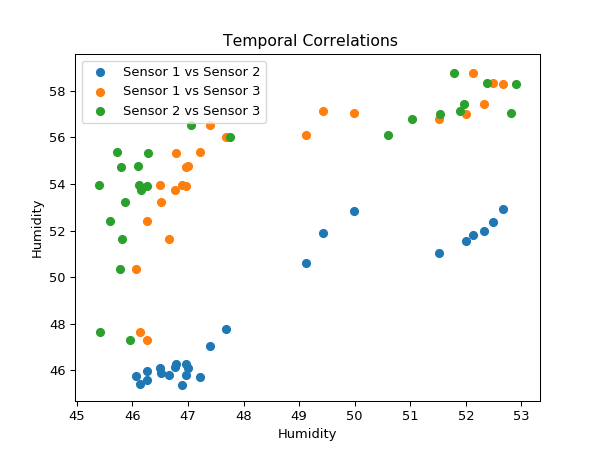

In [53]:
plt.figure(4)
plt.scatter(sen_1['humidity'],sen_2['humidity'],label='Sensor 1 vs Sensor 2')
plt.scatter(sen_1['humidity'],sen_3['humidity'],label='Sensor 1 vs Sensor 3')
plt.scatter(sen_2['humidity'],sen_3['humidity'],label='Sensor 2 vs Sensor 3')
plt.xlabel('Humidity')
plt.ylabel('Humidity')
plt.legend()
plt.title(' Temporal Correlations')
plt.show()